Problem Statement
----------------------------
Have you ever wondered how lenders use various factors such as credit score, annual income, the loan amount approved, tenure, debt-to-income ratio etc. and select your interest rates? 

The process, defined as ‘risk-based pricing’, uses a sophisticated algorithm that leverages different determining factors of a loan applicant. Selection of significant factors will help develop a prediction algorithm which can estimate loan interest rates based on clients’ information. On one hand, knowing the factors will help consumers and borrowers to increase their credit worthiness and place themselves in a better position to negotiate for getting a lower interest rate. On the other hand, this will help lending companies to get an immediate fixed interest rate estimation based on clients information. Here, your goal is to use a training dataset to predict the loan rate category (1 / 2 / 3) that will be assigned to each loan in our test set.

You can use any combination of the features in the dataset to make your loan rate category predictions. Some features will be easier to use than others.

https://datahack.analyticsvidhya.com/contest/janatahack-machine-learning-for-banking/#ProblemStatement

In [1]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train['TAG']='TRAIN'
test['TAG']='TEST'
combined=pd.concat([train,test],sort=False)

In [3]:
#%autosave 60

# BASIC EXPLORATIONS

In [4]:
combined.shape

(273850, 15)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

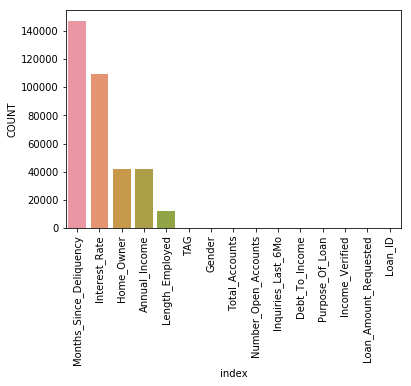

In [5]:
x=(combined.isnull().sum() * 100 / len(combined)).round(2).sort_values(ascending=False)
y=combined.isnull().sum().sort_values(ascending=False)
FR=pd.concat([x,y],axis=1,keys=['PRECENT','COUNT']).reset_index()
sns.barplot(FR['index'],FR['COUNT'])
plt.xticks(rotation=90)

In [6]:
combined.isnull().sum()

Loan_ID                         0
Loan_Amount_Requested           0
Length_Employed             12307
Home_Owner                  42060
Annual_Income               42000
Income_Verified                 0
Purpose_Of_Loan                 0
Debt_To_Income                  0
Inquiries_Last_6Mo              0
Months_Since_Deliquency    147238
Number_Open_Accounts            0
Total_Accounts                  0
Gender                          0
Interest_Rate              109541
TAG                             0
dtype: int64

In [7]:
combined.dtypes


Loan_ID                      int64
Loan_Amount_Requested       object
Length_Employed             object
Home_Owner                  object
Annual_Income              float64
Income_Verified             object
Purpose_Of_Loan             object
Debt_To_Income             float64
Inquiries_Last_6Mo           int64
Months_Since_Deliquency    float64
Number_Open_Accounts         int64
Total_Accounts               int64
Gender                      object
Interest_Rate              float64
TAG                         object
dtype: object

In [8]:
# Loan_Amount_requested isn't in relevant datatype bucket.
combined.Loan_Amount_Requested=combined.Loan_Amount_Requested.str.replace(',', '').astype('int')


In [9]:
combined.describe()

,Loan_ID,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,2.738500e+05,273850.000000,2.318500e+05,273850.000000,273850.000000,126612.000000,273850.000000,273850.000000,164309.000000
mean,1.013693e+07,14352.992240,7.339279e+04,17.215901,0.784543,34.103395,11.186025,25.067975,2.158951
std,7.905383e+04,8289.036702,5.852984e+04,7.845967,1.036816,21.750307,4.973663,11.589677,0.738364
min,1.000000e+07,500.000000,3.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.006846e+07,8000.000000,4.500000e+04,11.360000,0.000000,16.000000,8.000000,17.000000,2.000000
50%,1.013693e+07,12000.000000,6.300000e+04,16.850000,0.000000,31.000000,10.000000,23.000000,2.000000
75%,1.020539e+07,20000.000000,8.900000e+04,22.780000,1.000000,49.000000,14.000000,32.000000,3.000000
max,1.027385e+07,35000.000000,7.500000e+06,39.990000,8.000000,180.000000,84.000000,156.000000,3.000000


In [10]:
combined.describe(include='object')

,Length_Employed,Home_Owner,Income_Verified,Purpose_Of_Loan,Gender,TAG
count,261543,231790,273850,273850,273850,273850
unique,11,5,3,14,2,2
top,10+ years,Mortgage,VERIFIED - income,debt_consolidation,Male,TRAIN
freq,88328,117270,99076,161403,194993,164309


In [11]:
combined.nunique(axis=0)

Loan_ID                    273850
Loan_Amount_Requested        1320
Length_Employed                11
Home_Owner                      5
Annual_Income               18573
Income_Verified                 3
Purpose_Of_Loan                14
Debt_To_Income               3987
Inquiries_Last_6Mo              9
Months_Since_Deliquency       132
Number_Open_Accounts           61
Total_Accounts                103
Gender                          2
Interest_Rate                   3
TAG                             2
dtype: int64

In [12]:
combined.shape

(273850, 15)

# Distribution of the TARGET

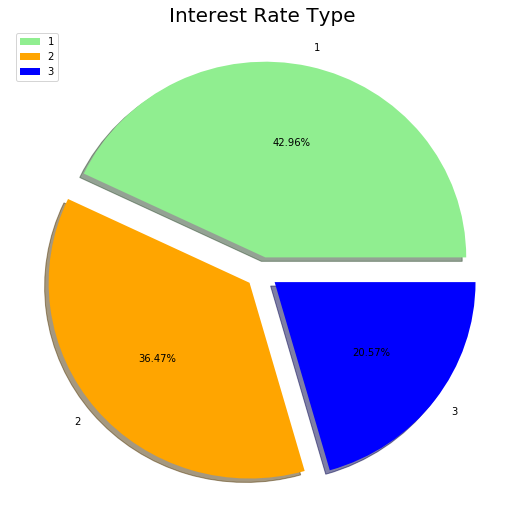

In [13]:
labels = ['1', '2','3']
size = train['Interest_Rate'].value_counts()
colors = ['lightgreen', 'orange','blue']
explode = [0.08, 0.08,0.08]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Interest Rate Type', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

# Categorical Variables

In [14]:
#Filter categorical variables
cat_columns = [x for x in combined.dtypes.index if combined.dtypes[x]=='object']
#Exclude :
cat_columns = [x for x in cat_columns if x not in ['Loan_ID','TAG']]
#Print frequency of categories
for col in cat_columns:
    print('\nFrequency of Categories for variable %s'%col)
    print(combined[col].value_counts())


Frequency of Categories for variable Length_Employed
10+ years    88328
2 years      24420
3 years      21478
< 1 year     21133
5 years      18042
1 year       17336
4 years      16393
7 years      15444
6 years      15351
8 years      13115
9 years      10503
Name: Length_Employed, dtype: int64

Frequency of Categories for variable Home_Owner
Mortgage    117270
Rent         93542
Own          20879
Other           79
None            20
Name: Home_Owner, dtype: int64

Frequency of Categories for variable Income_Verified
VERIFIED - income           99076
VERIFIED - income source    88253
not verified                86521
Name: Income_Verified, dtype: int64

Frequency of Categories for variable Purpose_Of_Loan
debt_consolidation    161403
credit_card            61394
home_improvement       15455
other                  13846
major_purchase          5712
small_business          4064
car                     3149
medical                 2633
moving                  1675
vacation           

# Observations

## Home_Owner:
We can merge 'Other','None', 'Unknown'(to be imputed for missing) together.

## Income Verified:  
looks like two of the dispositions ( VERIFIED income, VERIFIED income source needs to be merged)

## Purpose of loan
can be grouped on the following type of loans to reduce the levels

a)Education

b)Personal- Wedding, moving, major_purchase, home_improvement, vacation, medical

c)debt_consolidation

d)house

e)car

f)Other- renewable energy, other, small business loans

g)credit


In [15]:
# Numerical Variables

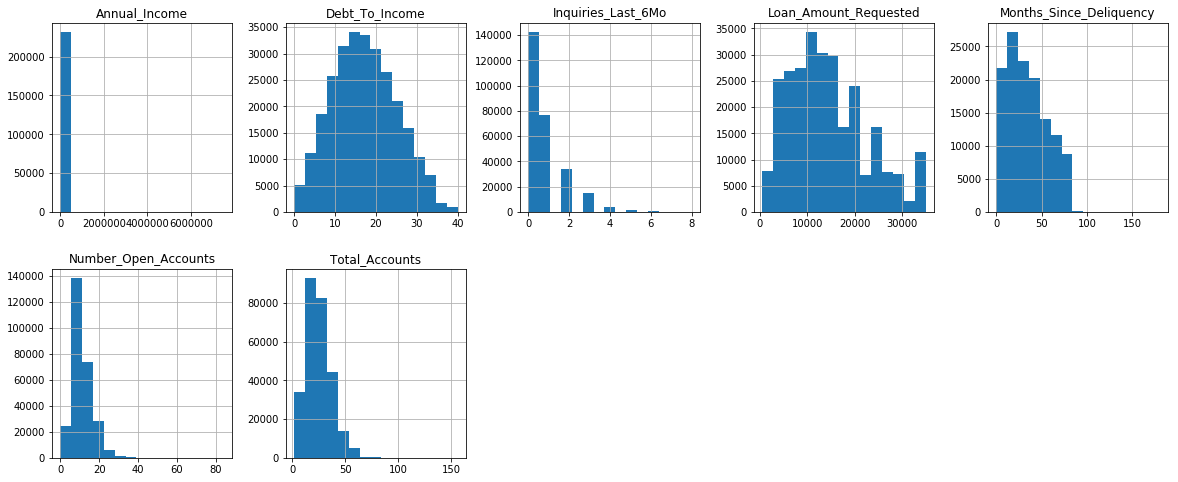

In [16]:
nums = [x for x in combined.dtypes.index if combined.dtypes[x]!='object']
#Exclude :
nums = [x for x in nums if x not in ['Loan_ID','Interest_Rate']]
combined[nums].hist(bins=15, figsize=(20, 8), layout=(2, 5));

# CLEANING/PRE_PROCESSING/FEATURE ENGINEERING STEP

In [17]:
# #PRE-PROCESSING/VARIABLE CLEANING BEFORE IMPUTATION/ FEATURE EXTRACTION

# #Home Owner
# combined['Home_Owner'] =  combined['Home_Owner'].replace({'Other':'Unknown','None':'Unknown'})

# # #Income Verified
# combined['Income_Verified'] =  combined['Income_Verified'].replace({'VERIFIED - income':'Verified','VERIFIED - income source':'Verified'})

# # #purpose of loan
# # l=['home_improvement','major_purchase', 'medical', 'moving','wedding', 'vacation']
# # o=['renewable_energy','other','small_business']
combined['Purpose_Of_Loan'] =  combined['Purpose_Of_Loan'].replace({'renewable_energy':'Others','other':'Others'})
combined['Purpose_Of_Loan'] =  combined['Purpose_Of_Loan'].replace({'home_improvement':'Personal','medical':'Personal','small_business':'Personal','major_purchase':'Personal','vacation':'Personal','wedding':'Personal','moving':'Personal'})
# combined['Purpose_Of_Loan'] =  combined['Purpose_Of_Loan'].replace({'educational':'ECH','house':'ECH','car':'ECH'})

# no of closed/cleared accounts

combined['Cleared_Accounts']=combined['Total_Accounts']-combined['Number_Open_Accounts']

#query classification
# combined['queries_Y_N']= np.where(combined['Inquiries_Last_6Mo']>0,"Y","N")

#Loan_to_Annual_Income
# combined['Loan_To_Annual_Income']=combined['Loan_Amount_Requested']/combined['Annual_Income']

#bin the loan amount

def loans(combined):
    if combined['Loan_Amount_Requested'] >=0 and combined['Loan_Amount_Requested'] <=8000:
        return "0-8K"
    elif combined['Loan_Amount_Requested'] >8000 and combined['Loan_Amount_Requested'] <=16000:
        return "8-16K"
    elif combined['Loan_Amount_Requested'] >16000 and combined['Loan_Amount_Requested'] <=24000:
        return "16-24K"
    else:
        return "24K+"
combined['LA_bucket']= combined.apply(loans,axis=1) 

In [18]:
combined.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Gender', 'Interest_Rate', 'TAG', 'Cleared_Accounts',
       'LA_bucket'],
      dtype='object')

In [19]:
combined.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,TAG,Cleared_Accounts,LA_bucket
0,10000001,7000,< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1.0,TRAIN,5,0-8K
1,10000002,30000,4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3.0,TRAIN,12,24K+
2,10000003,24725,7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3.0,TRAIN,4,24K+
3,10000004,16000,< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3.0,TRAIN,6,8-16K
4,10000005,17000,8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1.0,TRAIN,11,16-24K




We saw above that the following have missing values:

1)Months_Since_Deliquency- 

If you miss a payment on your loans, you're considered delinquent.
The day after you miss your payment, you technically are in delinquency.
Default occurs when you remain in delinquency on  loans for a set period of time

2)Home_Owner 

3)Annual_Income

4)Length_Employed


# IMPUTATION



https://en.wikipedia.org/wiki/Imputation_%28statistics%29#Multiple_imputation

In [20]:
#IMPUTATION
#Home Owner
combined.Home_Owner.fillna("Unknown",inplace=True)



In [21]:
#b)Length_Employed
#Determing the mode for each
from scipy.stats import mode
mode = combined.pivot_table(values='Length_Employed', columns='Income_Verified',aggfunc=(lambda x:mode(x.astype('str')).mode[0]) )
miss_bool = combined['Length_Employed'].isnull() 
combined.loc[miss_bool,'Length_Employed'] = combined.loc[miss_bool,'Income_Verified'].apply(lambda x: mode[x])

# combined.Length_Employed.fillna("U",inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [22]:
# Annual Income(AI)
AI = combined.pivot_table(values='Annual_Income', index='LA_bucket')

# # #Get a boolean variable specifying missing AI values
miss_bool = combined['Annual_Income'].isnull() 

# # # #Impute data

combined.loc[miss_bool,'Annual_Income'] = combined.loc[miss_bool,'LA_bucket'].apply(lambda x: AI.loc[x])

In [23]:
#Months_Since_Deliquency
#if there is no deliquency, it can be imputed on the basis if the income source was verified or not
MSD = combined.pivot_table(values='Months_Since_Deliquency', index='Income_Verified')
miss_bool = combined['Months_Since_Deliquency'].isnull() 
combined.loc[miss_bool,'Months_Since_Deliquency'] = combined.loc[miss_bool,'Income_Verified'].apply(lambda x: MSD.loc[x])


In [24]:
combined.isnull().sum()

Loan_ID                         0
Loan_Amount_Requested           0
Length_Employed                 0
Home_Owner                      0
Annual_Income                   0
Income_Verified                 0
Purpose_Of_Loan                 0
Debt_To_Income                  0
Inquiries_Last_6Mo              0
Months_Since_Deliquency         0
Number_Open_Accounts            0
Total_Accounts                  0
Gender                          0
Interest_Rate              109541
TAG                             0
Cleared_Accounts                0
LA_bucket                       0
dtype: int64

In [25]:
#DISTRIBUTION OF CATEGORICAL VARIABLES
cat = [x for x in combined.dtypes.index if combined.dtypes[x]=='object']
cat = [x for x in cat if x not in ['Loan_ID','TAG']]
cat

['Length_Employed',
 'Home_Owner',
 'Income_Verified',
 'Purpose_Of_Loan',
 'Gender',
 'LA_bucket']

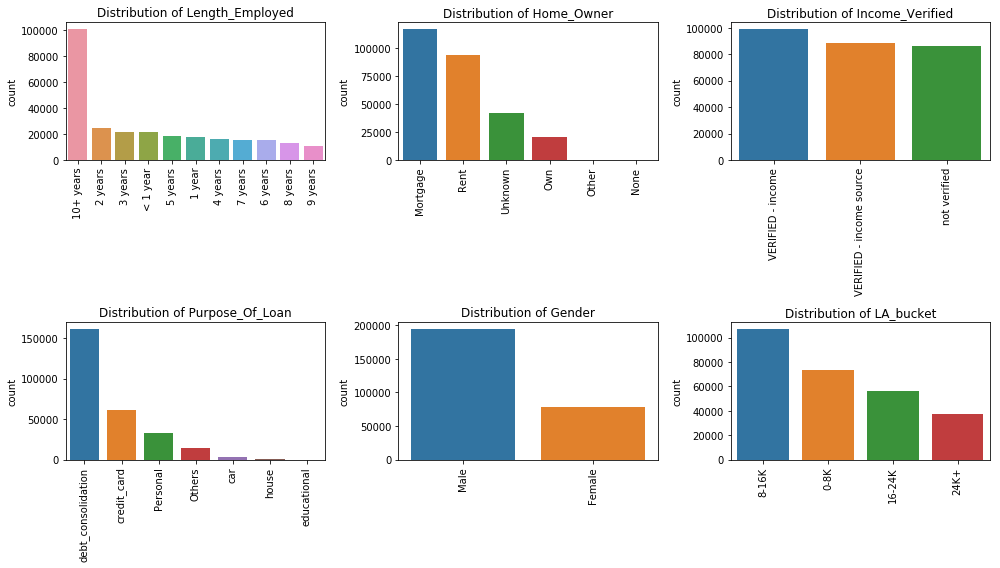

In [26]:

fig = plt.figure(1, (14, 8))

for i,cat in enumerate(combined[cat]):
    ax = plt.subplot(2,3,i+1)
    sns.countplot(combined[cat], order=combined[cat].value_counts().index)
    ax.set_xlabel("")
    ax.set_title(f'Distribution of {cat}')
    plt.tight_layout()
    plt.xticks(rotation=90)
    

plt.show()

In [27]:
nums = [x for x in combined.dtypes.index if combined.dtypes[x]!='object']
#Exclude :
nums = [x for x in nums if x not in ['Loan_ID','Interest_Rate','Loan_Amount_Requested']]

In [28]:
# !pip install dython

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


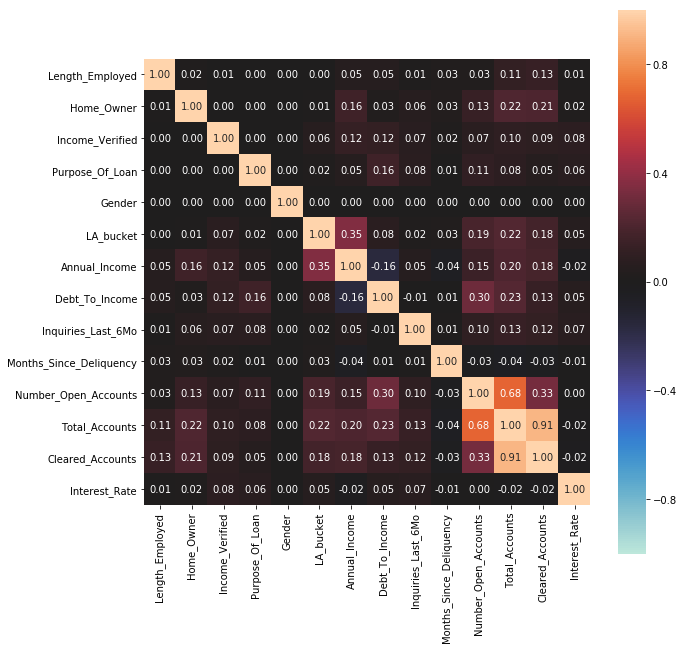

{'corr':                          Length_Employed    Home_Owner  Income_Verified  \
 Length_Employed                 1.000000  1.585770e-02         0.007507   
 Home_Owner                      0.009202  1.000000e+00         0.003191   
 Income_Verified                 0.003926  2.875459e-03         1.000000   
 Purpose_Of_Loan                 0.000450  3.392114e-03         0.002128   
 Gender                          0.000011  8.819808e-07         0.000007   
 LA_bucket                       0.002397  1.408954e-02         0.070661   
 Annual_Income                   0.048877  1.562997e-01         0.120087   
 Debt_To_Income                  0.053940  2.635911e-02         0.115887   
 Inquiries_Last_6Mo              0.010889  5.685294e-02         0.066340   
 Months_Since_Deliquency         0.026637  3.227379e-02         0.018972   
 Number_Open_Accounts            0.027451  1.271851e-01         0.070540   
 Total_Accounts                  0.110441  2.150678e-01         0.101426   
 Cle

In [29]:
#Correlation/Association
from dython.nominal import associations

cat = [x for x in combined.dtypes.index if combined.dtypes[x]=='object']
cat = [x for x in cat if x not in ['Loan_ID','TAG']]
associations(combined[(cat+nums+['Interest_Rate'])], theil_u=True, figsize=(10, 10))

In [30]:
combined.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,TAG,Cleared_Accounts,LA_bucket
0,10000001,7000,< 1 year,Rent,68000.000000,not verified,car,18.37,0,34.005607,9,14,Female,1.0,TRAIN,5,0-8K
1,10000002,30000,4 years,Mortgage,114720.784382,VERIFIED - income,debt_consolidation,14.93,0,17.000000,12,24,Female,3.0,TRAIN,12,24K+
2,10000003,24725,7 years,Mortgage,75566.400000,VERIFIED - income source,debt_consolidation,15.88,0,33.809440,12,16,Male,3.0,TRAIN,4,24K+
3,10000004,16000,< 1 year,Unknown,56160.000000,VERIFIED - income source,debt_consolidation,14.34,3,33.809440,16,22,Male,3.0,TRAIN,6,8-16K
4,10000005,17000,8 years,Own,96000.000000,VERIFIED - income source,debt_consolidation,22.17,1,33.809440,19,30,Female,1.0,TRAIN,11,16-24K


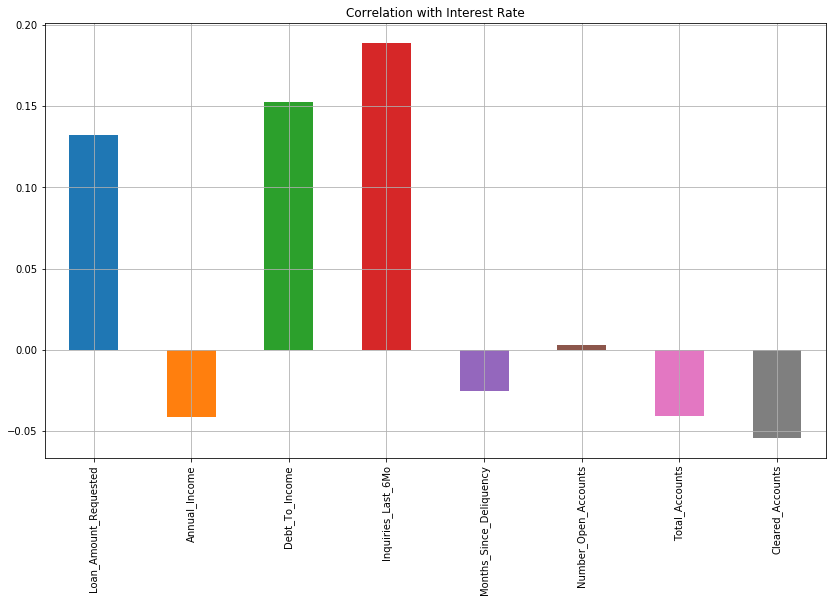

In [31]:
df1=combined.drop(['Interest_Rate','TAG','Loan_ID'],axis=1)

# plt.figure(figsize=(20,10)) 
# sns.heatmap(df1.corr(), annot=True)
df1.corrwith(combined.Interest_Rate).plot.bar(
        figsize = (14, 8), title = "Correlation with Interest Rate", fontsize = 10,
        rot = 90, grid = True)

In [32]:
train=combined[combined['TAG']=='TRAIN']
test=combined[combined['TAG']=='TEST']
# train=train.drop(['TAG','Inquiries_Last_6Mo','Total_Accounts','Gender','Number_Open_Accounts','Home_Owner','Length_Employed'],axis=1)
# test=test.drop(['TAG','Interest_Rate','Inquiries_Last_6Mo','Total_Accounts','Number_Open_Accounts','Gender','Home_Owner','Length_Employed'],axis=1)
# train=train.drop(['TAG','Inquiries_Last_6Mo','Gender','Number_Open_Accounts'],axis=1)
# test=test.drop(['TAG','Interest_Rate','Inquiries_Last_6Mo','Gender','Number_Open_Accounts'],axis=1)
train=train.drop(['TAG','Total_Accounts','Loan_Amount_Requested'],axis=1)
test=test.drop(['TAG','Interest_Rate','Total_Accounts','Loan_Amount_Requested'],axis=1)

In [33]:
train.shape,test.shape

((164309, 14), (109541, 13))

In [0]:
# !pip install catboost

In [0]:
from sklearn.model_selection import KFold
# Set up folds
K=7
kf = KFold(n_splits = K, random_state = 7, shuffle = True)
MAX_ROUNDS = 1000
t = False
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score
X = train.drop(columns=['Loan_ID','Interest_Rate'],axis=1)
y = train['Interest_Rate']
X_test =test.drop(['Loan_ID'],axis=1)
y_valid_pred = 0*y
y_test_pred = 0
F1 = 0
result={}
#specifying categorical variables indexes
cat_columns = [x for x in X.dtypes.index if X.dtypes[x]=='object']
#fitting catboost classifier model
j=1
model = CatBoostClassifier(n_estimators=MAX_ROUNDS,task_type="GPU",verbose=False,learning_rate=0.07, leaf_estimation_iterations=1)
for i, (train_index, test_index) in enumerate(kf.split(train)):

#for train_index, test_index in skf.split(X, y):  
    # Create data for this fold
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    X_train, X_valid = X.iloc[train_index,:], X.iloc[test_index,:]
    print( "\nFold ", j)
    #print( "\nFold ", i)
    
    # Run model for this fold
    if t:
        fit_model = model.fit( X_train, y_train, 
                               eval_set=[X_valid, y_valid],cat_features=cat_columns,
                               use_best_model=True
                             )
        print( "  N trees = ", model.tree_count_ )
    else:
        fit_model = model.fit( X_train, y_train,cat_features=cat_columns )
        
    # Generate validation predictions for this fold
    pred = fit_model.predict(X_valid)
    y_valid_pred.iloc[test_index] = pred.reshape(-1)
    print(f1_score(y_valid,pred,average='weighted'))
    F1+=f1_score(y_valid,pred,average='weighted')



    # Accumulate test set predictions
    y_test_pred += fit_model.predict(X_test)
    result[j]=fit_model.predict(X_test)
    j+=1
results = y_test_pred / K  # Average test set predictions
print(F1/K)

In [0]:

d = pd.DataFrame()
for i in range(1, 6):
    d = pd.concat([d,pd.DataFrame(result[i])],axis=1)
d.columns=['1','2','3','4','5']
x = d.mode(axis=1)[0]
sub = pd.read_csv('sample_submission.csv')
sub.Interest_Rate = x


In [0]:
sub.to_csv('CAT_BOOST_final_v3.csv',index = False)